## Loading Data from the Dev GeoDB




### Obtain Access to GeoDB

In [31]:
from dcfs_geodb.core.geo_db import GeoDBClient

In [32]:
geodb = GeoDBClient()
geodb.whoami

'helge'

### List Datasets

__Step 1__: List my datasets.

In [74]:
geodb.get_datasets()

,table_name
0,land_use


__Step 2__: Let's get the whole dataset content.

In [34]:
gdf = geodb.filter('land_use')
gdf.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,3,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((456099.635 97696.070, 456112.810 976...",2305689,7000,2019-02-25
1,4,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((455929.405 97963.785, 455933.284 979...",2305596,1100,2019-02-25
2,5,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((461561.512 96119.256, 461632.114 960...",2310160,1100,2019-03-11
3,6,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((458139.092 95583.227, 458136.249 955...",3602865,1500,2019-01-05
4,7,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((458123.067 95461.892, 458123.413 954...",3602883,1500,2019-01-05


__Step 3__: Plot the GeoDataframe

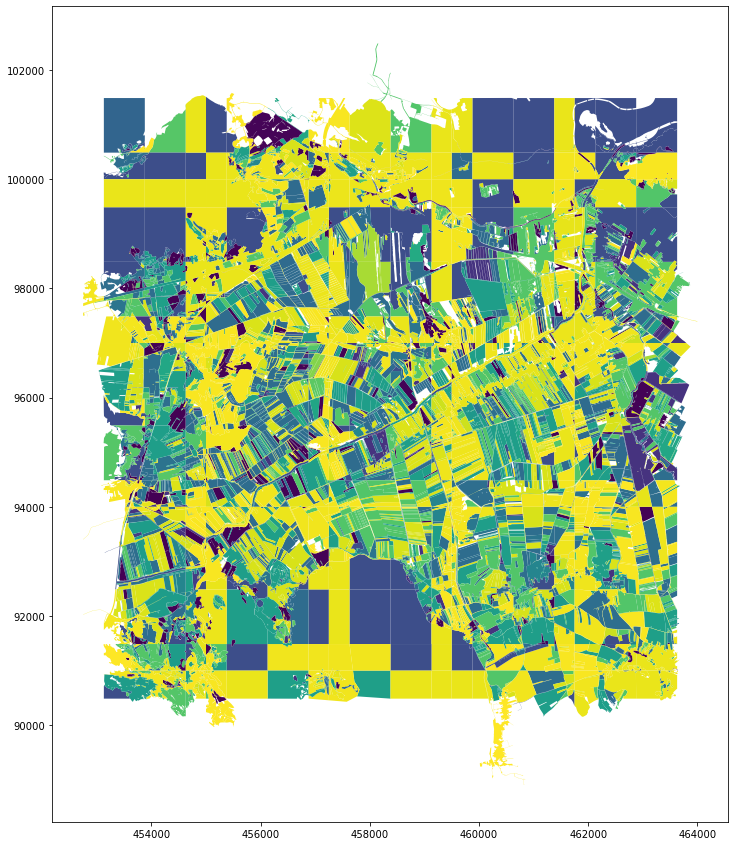

In [36]:
gdf.plot(column="raba_pid", figsize=(15,15))

__Step 5__: Subselect the data. Here: Select a specific use

In [76]:
gdfsub = geodb.filter('land_use', query='raba_id=eq.1410')
gdfsub.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,9828,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,9849,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
2,9855,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
3,9859,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05
4,9861,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((456405.039 100087.946, 456399.544 10...",2302127,1410,2019-04-01


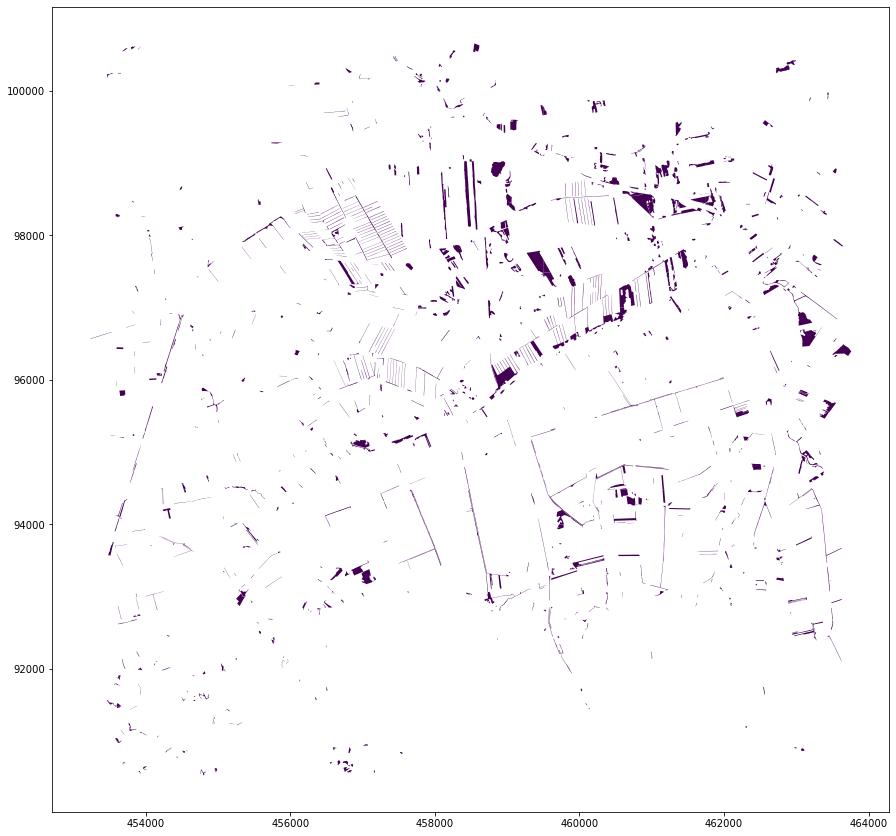

In [79]:
gdfsub.plot(column="raba_id", figsize=(15,15))

__Step 6__: Filter by bbox

In [80]:
gdf = geodb.filter_by_bbox(dataset="land_use", minx=452750.0, miny=88909.549, maxx=464000.0, maxy=102486.299,
                           bbox_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,11,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((460137.998 95628.898, 460111.001 956...",5983161,1100,2019-03-11
1,12,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((453673.609 91328.224, 453678.929 913...",5983074,1600,2019-03-26
2,13,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((460312.295 96127.114, 460300.319 961...",5983199,1600,2019-03-11
3,14,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((460459.445 96117.356, 460470.516 961...",5983217,1100,2019-03-11
4,15,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((457798.753 99628.982, 457783.076 996...",6299143,1600,2019-03-04
...,...,...,...,...,...,...,...
195,187,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((463149.253 91486.313, 463150.893 914...",3605117,1222,2019-01-22
196,188,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((456313.311 95093.848, 456311.606 950...",2346923,1100,2019-01-05
197,189,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((462603.213 92479.041, 462597.138 925...",5985150,1222,2019-01-23
198,190,2020-01-21T09:10:52.360238+00:00,None,"POLYGON ((459866.862 91774.423, 459863.171 917...",2332890,1222,2019-02-21


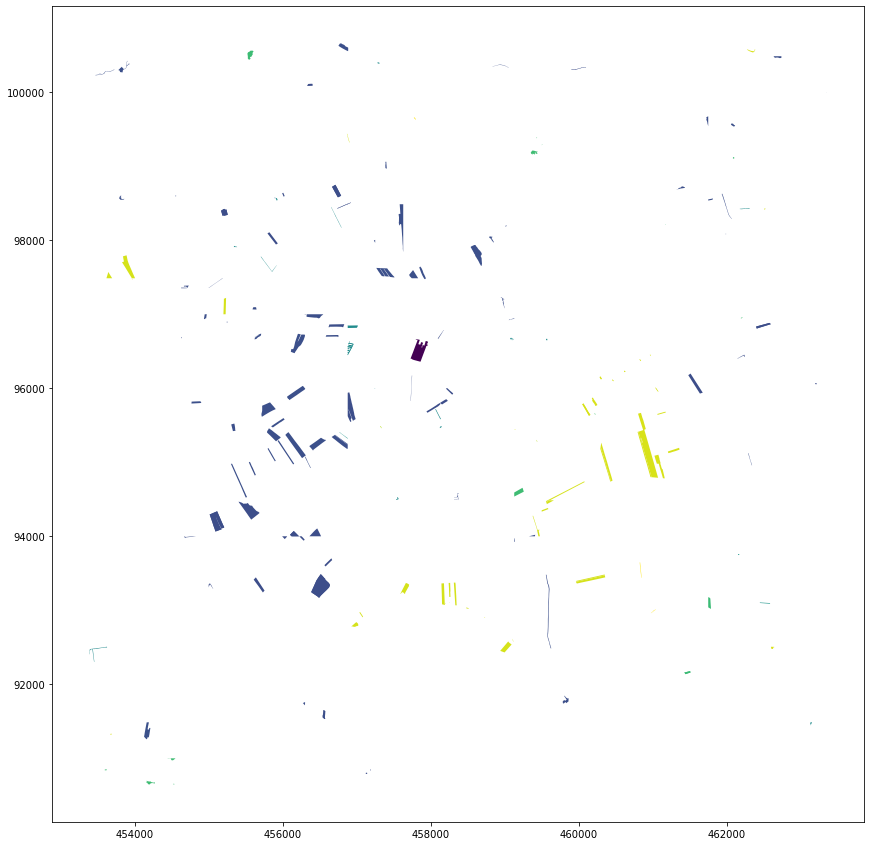

In [82]:
gdf.plot(column="raba_pid", figsize=(15,15))

__Step 6__: Fltering using PostGres Syntax

In [83]:
gdf = geodb.filter_raw('land_use', where='"raba_id"=1410')
gdf.head()

SELECT * FROM "helge_land_use" WHERE "raba_id"=1410 


,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,9828,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,9849,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
2,9855,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
3,9859,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05
4,9861,2020-01-21T09:14:53.459981+00:00,None,"POLYGON ((456405.039 100087.946, 456399.544 10...",2302127,1410,2019-04-01


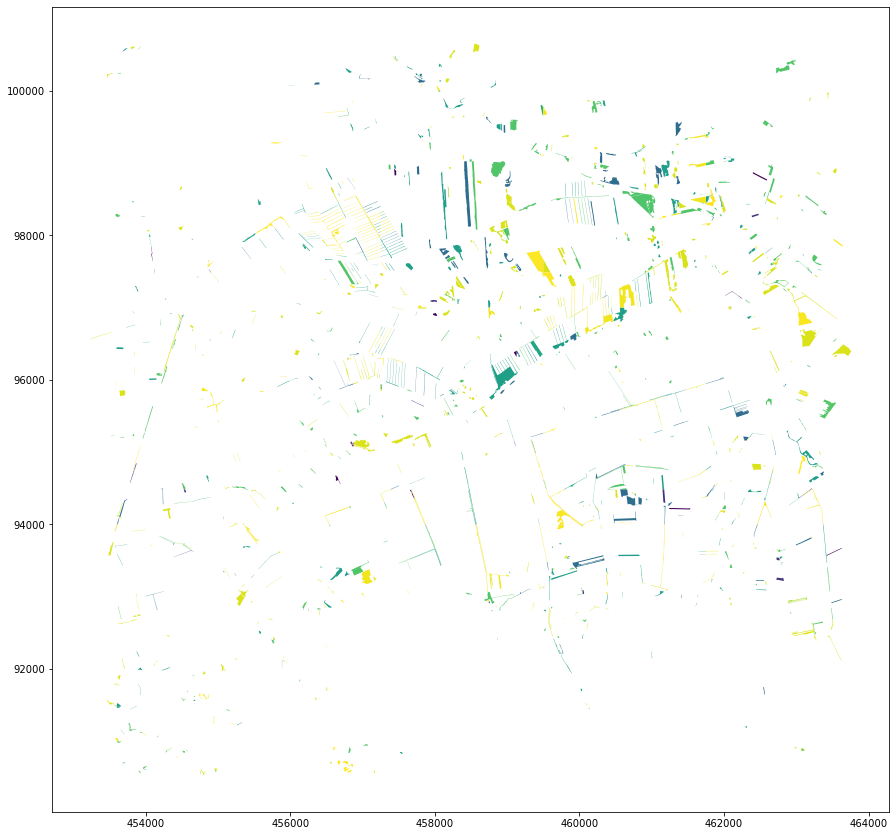

In [84]:
gdf.plot(column="raba_pid", figsize=(15,15))

__Step 7__: Fltering using PostGres Syntax Allowing Aggregation

In [85]:
df = geodb.filter_raw('land_use', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()

SELECT COUNT(d_od) as ct, d_od FROM "helge_land_use" WHERE raba_id=1410 GROUP BY d_od 


,ct,d_od
0,12,2019-03-21
1,17,2019-03-13
2,26,2019-02-20
3,3,2019-02-07
4,11,2019-01-16
